In [161]:
import pandas as pd
import json
import numpy
from pprint import pprint
import requests
import matplotlib.pyplot as plt
import scipy.stats as st

In [61]:
# load data using Python JSON module
my_file = '../Share/city_data.json'
with open(my_file ,'r') as f:
    data = json.loads(f.read())
# Flatten data
cities_df = pd.json_normalize(data)


In [62]:
cities_df.columns

Index(['datasetid', 'recordid', 'record_timestamp', 'fields.elevation',
       'fields.name', 'fields.modification_date', 'fields.country',
       'fields.feature_class', 'fields.admin3_code', 'fields.alternate_names',
       'fields.feature_code', 'fields.longitude', 'fields.geoname_id',
       'fields.timezone', 'fields.dem', 'fields.country_code',
       'fields.ascii_name', 'fields.latitude', 'fields.admin1_code',
       'fields.coordinates', 'fields.admin2_code', 'fields.population',
       'geometry.type', 'geometry.coordinates'],
      dtype='object')

In [63]:
#select columns
cities_df = cities_df[['fields.name', 'fields.admin1_code', 'fields.country_code', 'fields.population', 'fields.latitude', 'fields.longitude']]


In [64]:
#rename columns
cities_df = cities_df.rename(columns={'fields.name': 'City', 'fields.admin1_code': 'State', 'fields.country_code': 'Country',
       'fields.population': 'Population', 'fields.latitude': 'Latitude', 'fields.longitude': 'Longitude'})

In [65]:
#create group object containing state groups of cities
city_grp = cities_df.groupby(['State'])

In [66]:
#iterate group object and return max population for each group (state) in group object
lgst_cities = city_grp.apply(lambda g: g[g['Population'] == g['Population'].max()])

In [67]:
#reset the indexes
lgst_cities = lgst_cities.reset_index(drop=True)
lgst_cities

,City,State,Country,Population,Latitude,Longitude
0,Anchorage,AK,US,298695,61.21806,-149.90028
1,Birmingham,AL,US,212461,33.52066,-86.80249
2,Little Rock,AR,US,197992,34.74648,-92.28959
3,Phoenix,AZ,US,1563025,33.44838,-112.07404
4,Los Angeles,CA,US,3971883,34.05223,-118.24368
5,Denver,CO,US,682545,39.73915,-104.9847
6,Bridgeport,CT,US,147629,41.17923,-73.18945
7,Washington,DC,US,601723,38.89511,-77.03637
8,Wilmington,DE,US,71948,39.74595,-75.54659
9,Jacksonville,FL,US,868031,30.33218,-81.65565


In [68]:
#add colums for retrieved data
new_cols = ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education', 'Environmental Quality', 'Economy', 'Taxation', 'Internet Access', 'Leisure & Culture']
for col in new_cols:
    lgst_cities[col] = ""
lgst_cities

,City,State,Country,Population,Latitude,Longitude,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture
0,Anchorage,AK,US,298695,61.21806,-149.90028,,,,,,,,,,,,,,,
1,Birmingham,AL,US,212461,33.52066,-86.80249,,,,,,,,,,,,,,,
2,Little Rock,AR,US,197992,34.74648,-92.28959,,,,,,,,,,,,,,,
3,Phoenix,AZ,US,1563025,33.44838,-112.07404,,,,,,,,,,,,,,,
4,Los Angeles,CA,US,3971883,34.05223,-118.24368,,,,,,,,,,,,,,,
5,Denver,CO,US,682545,39.73915,-104.9847,,,,,,,,,,,,,,,
6,Bridgeport,CT,US,147629,41.17923,-73.18945,,,,,,,,,,,,,,,
7,Washington,DC,US,601723,38.89511,-77.03637,,,,,,,,,,,,,,,
8,Wilmington,DE,US,71948,39.74595,-75.54659,,,,,,,,,,,,,,,
9,Jacksonville,FL,US,868031,30.33218,-81.65565,,,,,,,,,,,,,,,


In [69]:
#MAKE REQUEST AND STORE DATA BACK IN DATAFRAME

#The URL is kind of crazy becausae you have to find the city in an urban area and then push the urban area into the query - it's nested.  They provide some instructions, but their example is wrong, so don't follow that.  The instructions are:  "Alternatively, we can find the Urban Area that a city belongs to. E.g. let's find out how the urban area corresponding to Palo Alto, California performs in terms of Teleport scores. Let's use the API Explorer for the city search endpoint to construct the URL. In the search field enter Palo Alto, California, in the embed field, type city:search-results/city:item/city:urban_area/ua:scores, and click the Try it out! button."

#Base URL 
url_open = 'https://api.teleport.org/api/cities/?search='
url_close = "&limit=1&embed=city%3Asearch-results%2Fcity%3Aitem%2Fcity%3Aurban_area%2Fua%3Ascores"

#create a list to loop to gather json data from response
my_categories = pd.DataFrame(new_cols)

print("""
Beginning processing city data:
------------------------------------------""")

#loop dataframe randomly created above and return data / use the index so the return data can be pushed into the existing lgst_cities dataframe
for ind in lgst_cities.index:

    #get city data and transform 
    my_city = lgst_cities['City'][ind].replace(' ', '%20')
    my_state = lgst_cities['State'][ind]

    urban_area = my_city + '%2C%20' + my_state

    # Build query URL
    query_url = f"{url_open}{urban_area}{url_close}"

    #make request and hold response
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {ind + 1} of {len(lgst_cities)}: {my_city}, {my_state}.")
        
        #gather data for each category
        for x in my_categories.index:
                    
            my_category = my_categories.iloc[x, 0]
                    
            #parse json for data
            my_data = response['_embedded']['city:search-results'][0]['_embedded']['city:item']['_embedded']['city:urban_area']['_embedded']['ua:scores']['categories'][x]['score_out_of_10']
                    
            #write the data to the dataframe
            lgst_cities.loc[lgst_cities.index[ind], my_category] = my_data

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")



Beginning processing city data:
------------------------------------------
Processing Record 1 of 51: Anchorage, AK.
Processing Record 2 of 51: Birmingham, AL.
Processing Record 3 of 51: Little%20Rock, AR.
Missing field/result... skipping.
Processing Record 4 of 51: Phoenix, AZ.
Processing Record 5 of 51: Los%20Angeles, CA.
Processing Record 6 of 51: Denver, CO.
Processing Record 7 of 51: Bridgeport, CT.
Missing field/result... skipping.
Processing Record 8 of 51: Washington, DC.
Processing Record 9 of 51: Wilmington, DE.
Missing field/result... skipping.
Processing Record 10 of 51: Jacksonville, FL.
Processing Record 11 of 51: Atlanta, GA.
Processing Record 12 of 51: Honolulu, HI.
Processing Record 13 of 51: Des%20Moines, IA.
Processing Record 14 of 51: Boise, ID.
Processing Record 15 of 51: Chicago, IL.
Processing Record 16 of 51: Indianapolis, IN.
Processing Record 17 of 51: Wichita, KS.
Missing field/result... skipping.
Processing Record 18 of 51: Lexington-Fayette, KY.
Missing fi

In [71]:
lgst_cities

,City,State,Country,Population,Latitude,Longitude,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture
0,Anchorage,AK,US,298695,61.21806,-149.90028,5.4335,3.141,2.7945,0,1.738,4.71525,8.671,3.4705,8.63267,3.6245,9.272,6.5145,4.772,4.9645,3.266
1,Birmingham,AL,US,212461,33.52066,-86.80249,6.5555,5.133,4.3575,1,1.4355,2.02075,8.671,1.776,8.74333,3.6245,7.0375,6.5145,4.204,5.1605,5.3835
2,Little Rock,AR,US,197992,34.74648,-92.28959,,,,,,,,,,,,,,,
3,Phoenix,AZ,US,1563025,33.44838,-112.07404,6.533,6.208,6.5085,4.558,3.3025,4.8285,8.671,2.583,8.56733,4.591,4.62525,6.5145,4.488,6.178,6.81
4,Los Angeles,CA,US,3971883,34.05223,-118.24368,1.5275,4.556,10,10,3.9585,3.677,8.57467,5.705,8.43967,8.6245,4.7315,6.5145,4.7675,5.4965,9.196
5,Denver,CO,US,682545,39.73915,-104.9847,3.8375,5.102,7.8645,6.117,4.243,4.53,8.671,5.371,8.61567,3.6245,7.11675,6.5145,4.346,5.4185,6.2235
6,Bridgeport,CT,US,147629,41.17923,-73.18945,,,,,,,,,,,,,,,
7,Washington,DC,US,601723,38.89511,-77.03637,1.2105,3.595,8.774,8.056,4.505,4.457,8.671,2.1915,8.49067,5.9685,6.99375,6.5145,4.062,3.8255,10
8,Wilmington,DE,US,71948,39.74595,-75.54659,,,,,,,,,,,,,,,
9,Jacksonville,FL,US,868031,30.33218,-81.65565,6.45,5.359,4.3475,2.545,1.5675,1.40575,8.671,3.8255,8.498,3.6245,7.12025,6.5145,4.772,6.1575,5.6545


In [80]:
##Get the federal county identifier (fips)
## sample url https://geo.fcc.gov/api/census/block/find?latitude=45&longitude=-93&format=xml
## First step is to create 'fips' and 'county' columns in the lgst cities df

lgst_cities.insert(2, 'County', '')
lgst_cities.insert(3, 'FIPS', '')
lgst_cities

,City,State,County,FIPS,Country,Population,Latitude,Longitude,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture
0,Anchorage,AK,,,US,298695,61.21806,-149.90028,5.4335,3.141,2.7945,0,1.738,4.71525,8.671,3.4705,8.63267,3.6245,9.272,6.5145,4.772,4.9645,3.266
1,Birmingham,AL,,,US,212461,33.52066,-86.80249,6.5555,5.133,4.3575,1,1.4355,2.02075,8.671,1.776,8.74333,3.6245,7.0375,6.5145,4.204,5.1605,5.3835
2,Little Rock,AR,,,US,197992,34.74648,-92.28959,,,,,,,,,,,,,,,
3,Phoenix,AZ,,,US,1563025,33.44838,-112.07404,6.533,6.208,6.5085,4.558,3.3025,4.8285,8.671,2.583,8.56733,4.591,4.62525,6.5145,4.488,6.178,6.81
4,Los Angeles,CA,,,US,3971883,34.05223,-118.24368,1.5275,4.556,10,10,3.9585,3.677,8.57467,5.705,8.43967,8.6245,4.7315,6.5145,4.7675,5.4965,9.196
5,Denver,CO,,,US,682545,39.73915,-104.9847,3.8375,5.102,7.8645,6.117,4.243,4.53,8.671,5.371,8.61567,3.6245,7.11675,6.5145,4.346,5.4185,6.2235
6,Bridgeport,CT,,,US,147629,41.17923,-73.18945,,,,,,,,,,,,,,,
7,Washington,DC,,,US,601723,38.89511,-77.03637,1.2105,3.595,8.774,8.056,4.505,4.457,8.671,2.1915,8.49067,5.9685,6.99375,6.5145,4.062,3.8255,10
8,Wilmington,DE,,,US,71948,39.74595,-75.54659,,,,,,,,,,,,,,,
9,Jacksonville,FL,,,US,868031,30.33218,-81.65565,6.45,5.359,4.3475,2.545,1.5675,1.40575,8.671,3.8255,8.498,3.6245,7.12025,6.5145,4.772,6.1575,5.6545


In [86]:
##Loop through and make the call for federal county identifier (fips) and write data to df

for ind in lgst_cities.index:

    #get city data and transform 
    my_city = lgst_cities['City'][ind]
    my_state = lgst_cities['State'][ind]
    lat = lgst_cities['Latitude'][ind]
    lon = lgst_cities['Longitude'][ind]

    #Contruct request URL
    query_url = f"https://geo.fcc.gov/api/census/block/find?latitude={lat}&longitude={lon}&format=json" 

    #make request and hold response
    response = requests.get(query_url).json()

    try:
        #print(f"Processing Record {ind + 1} of {len(lgst_cities)}: {my_city}, {my_state}.")
        
        #gather data for each category
        for x in my_categories.index:

            my_county = response['County']['name']
            my_fips = response['County']['FIPS']  

            #write data to df
            lgst_cities.loc[lgst_cities.index[ind], 'County'] = my_county
            lgst_cities.loc[lgst_cities.index[ind], 'FIPS'] = my_fips  


    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

lgst_cities

,City,State,County,FIPS,Country,Population,Latitude,Longitude,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture
0,Anchorage,AK,Anchorage,02020,US,298695,61.21806,-149.90028,5.4335,3.141,2.7945,0,1.738,4.71525,8.671,3.4705,8.63267,3.6245,9.272,6.5145,4.772,4.9645,3.266
1,Birmingham,AL,Jefferson,01073,US,212461,33.52066,-86.80249,6.5555,5.133,4.3575,1,1.4355,2.02075,8.671,1.776,8.74333,3.6245,7.0375,6.5145,4.204,5.1605,5.3835
2,Little Rock,AR,Pulaski,05119,US,197992,34.74648,-92.28959,,,,,,,,,,,,,,,
3,Phoenix,AZ,Maricopa,04013,US,1563025,33.44838,-112.07404,6.533,6.208,6.5085,4.558,3.3025,4.8285,8.671,2.583,8.56733,4.591,4.62525,6.5145,4.488,6.178,6.81
4,Los Angeles,CA,Los Angeles,06037,US,3971883,34.05223,-118.24368,1.5275,4.556,10,10,3.9585,3.677,8.57467,5.705,8.43967,8.6245,4.7315,6.5145,4.7675,5.4965,9.196
5,Denver,CO,Denver,08031,US,682545,39.73915,-104.9847,3.8375,5.102,7.8645,6.117,4.243,4.53,8.671,5.371,8.61567,3.6245,7.11675,6.5145,4.346,5.4185,6.2235
6,Bridgeport,CT,Fairfield,09001,US,147629,41.17923,-73.18945,,,,,,,,,,,,,,,
7,Washington,DC,District of Columbia,11001,US,601723,38.89511,-77.03637,1.2105,3.595,8.774,8.056,4.505,4.457,8.671,2.1915,8.49067,5.9685,6.99375,6.5145,4.062,3.8255,10
8,Wilmington,DE,New Castle,10003,US,71948,39.74595,-75.54659,,,,,,,,,,,,,,,
9,Jacksonville,FL,Duval,12031,US,868031,30.33218,-81.65565,6.45,5.359,4.3475,2.545,1.5675,1.40575,8.671,3.8255,8.498,3.6245,7.12025,6.5145,4.772,6.1575,5.6545


In [109]:
#Import county suicide rates
cdc_file = 'county_suicide_rates.csv'
suicide_data = pd.read_csv(cdc_file)

In [110]:
suicide_data = suicide_data.rename(columns={"County Code": "FIPS"})
suicide_data

,Unnamed: 0,County,FIPS,Deaths sum,summed_crude_rate,summed_adjusted_rate
0,1,"Baldwin County, AL",1003,34.0,15.230655,13.93443
1,2,"Calhoun County, AL",1015,15.0,13.203644,NaN
2,3,"Colbert County, AL",1033,12.0,21.722996,NaN
3,4,"DeKalb County, AL",1049,18.0,25.170249,NaN
4,5,"Elmore County, AL",1051,12.0,14.776687,NaN
...,...,...,...,...,...,...
515,967,"Racine County, WI",55101,16.0,8.150333,NaN
516,968,"Waukesha County, WI",55133,19.0,4.700667,NaN
517,969,"Laramie County, WY",56021,16.0,16.080402,NaN
518,970,"Natrona County, WY",56025,19.0,23.792231,NaN


In [111]:
suicide_data['FIPS'] = suicide_data['FIPS'].apply(str)

In [112]:
suicide_data['FIPS'] = suicide_data['FIPS'].str.zfill(5)

In [113]:
suicide_data

,Unnamed: 0,County,FIPS,Deaths sum,summed_crude_rate,summed_adjusted_rate
0,1,"Baldwin County, AL",01003,34.0,15.230655,13.93443
1,2,"Calhoun County, AL",01015,15.0,13.203644,NaN
2,3,"Colbert County, AL",01033,12.0,21.722996,NaN
3,4,"DeKalb County, AL",01049,18.0,25.170249,NaN
4,5,"Elmore County, AL",01051,12.0,14.776687,NaN
...,...,...,...,...,...,...
515,967,"Racine County, WI",55101,16.0,8.150333,NaN
516,968,"Waukesha County, WI",55133,19.0,4.700667,NaN
517,969,"Laramie County, WY",56021,16.0,16.080402,NaN
518,970,"Natrona County, WY",56025,19.0,23.792231,NaN


In [114]:
# Combine the data into a single dataset (County Code)
combined_data = lgst_cities.merge(suicide_data, how='left', on='FIPS')

In [123]:
combined_data.tail()

,City,State,County_x,FIPS,Country,Population,Latitude,Longitude,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Unnamed: 0,County_y,Deaths sum,summed_crude_rate,summed_adjusted_rate
46,Burlington,VT,Chittenden,50007,US,42452,44.47588,-73.21207,,,,,,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN
47,Seattle,WA,King,53033,US,684451,47.60621,-122.33207,2.291,3.79,8.367,7.551,2.8845,4.52375,8.671,5.6365,8.72433,5.7145,7.56025,6.5145,4.772,4.9405,8.1155,938.0,"King County, WA",297.0,13.183699,NaN
48,Milwaukee,WI,Milwaukee,55079,US,600155,43.0389,-87.90647,6.1225,5.526,4.8305,2.005,1.5875,4.915,8.671,4.267,8.59433,4.177,7.989,6.5145,4.204,4.346,6.8375,966.0,"Milwaukee County, WI",75.0,7.930415,7.721721
49,Charleston,WV,Kanawha,54039,US,49736,38.34982,-81.63262,,,,,,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN
50,Cheyenne,WY,Laramie,56021,US,63335,41.13998,-104.82025,,,,,,,,,,,,,,,,969.0,"Laramie County, WY",16.0,16.080402,NaN


In [128]:
combined_data['model_based_death_rate'] = ''

In [130]:
combined_data

,City,State,County_x,FIPS,Country,Population,Latitude,Longitude,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Unnamed: 0,County_y,Deaths sum,summed_crude_rate,summed_adjusted_rate,model_based_death_rate
0,Anchorage,AK,Anchorage,02020,US,298695,61.21806,-149.90028,5.4335,3.141,2.7945,0,1.738,4.71525,8.671,3.4705,8.63267,3.6245,9.272,6.5145,4.772,4.9645,3.266,22.0,"Anchorage Borough, AK",44.0,15.277778,14.983975,
1,Birmingham,AL,Jefferson,01073,US,212461,33.52066,-86.80249,6.5555,5.133,4.3575,1,1.4355,2.02075,8.671,1.776,8.74333,3.6245,7.0375,6.5145,4.204,5.1605,5.3835,9.0,"Jefferson County, AL",69.0,10.477198,10.346234,
2,Little Rock,AR,Pulaski,05119,US,197992,34.74648,-92.28959,,,,,,,,,,,,,,,,57.0,"Pulaski County, AR",47.0,11.992519,12.247680,
3,Phoenix,AZ,Maricopa,04013,US,1563025,33.44838,-112.07404,6.533,6.208,6.5085,4.558,3.3025,4.8285,8.671,2.583,8.56733,4.591,4.62525,6.5145,4.488,6.178,6.81,37.0,"Maricopa County, AZ",700.0,15.606140,15.606140,
4,Los Angeles,CA,Los Angeles,06037,US,3971883,34.05223,-118.24368,1.5275,4.556,10,10,3.9585,3.677,8.57467,5.705,8.43967,8.6245,4.7315,6.5145,4.7675,5.4965,9.196,86.0,"Los Angeles County, CA",833.0,8.297551,8.297551,
5,Denver,CO,Denver,08031,US,682545,39.73915,-104.9847,3.8375,5.102,7.8645,6.117,4.243,4.53,8.671,5.371,8.61567,3.6245,7.11675,6.5145,4.346,5.4185,6.2235,165.0,"Denver County, CO",124.0,17.051447,NaN,
6,Bridgeport,CT,Fairfield,09001,US,147629,41.17923,-73.18945,,,,,,,,,,,,,,,,188.0,"Fairfield County, CT",57.0,6.042411,NaN,
7,Washington,DC,District of Columbia,11001,US,601723,38.89511,-77.03637,1.2105,3.595,8.774,8.056,4.505,4.457,8.671,2.1915,8.49067,5.9685,6.99375,6.5145,4.062,3.8255,10,202.0,"District of Columbia, DC",27.0,3.825723,NaN,
8,Wilmington,DE,New Castle,10003,US,71948,39.74595,-75.54659,,,,,,,,,,,,,,,,199.0,"New Castle County, DE",41.0,7.337768,NaN,
9,Jacksonville,FL,Duval,12031,US,868031,30.33218,-81.65565,6.45,5.359,4.3475,2.545,1.5675,1.40575,8.671,3.8255,8.498,3.6245,7.12025,6.5145,4.772,6.1575,5.6545,222.0,"Duval County, FL",141.0,14.721928,13.571777,


In [136]:
##Death by drug poisoning by county
##Documentation url https://dev.socrata.com/foundry/data.cdc.gov/rpvx-m2md
# Sample call: 
# the_results = requests.get("https://data.cdc.gov/resource/rpvx-m2md.json?county=Hennepin County, MN&year=2018").json()

#Base URL 
url_open = 'https://data.cdc.gov/resource/rpvx-m2md.json?county='
url_close = '&year=2018'

print("""
Beginning processing city data:
------------------------------------------""")

#loop dataframe randomly created above and return data / use the index so the return data can be pushed into the existing combined_data dataframe
for ind in combined_data.index:

    #get county data and transform 
    my_county = combined_data['County_y'][ind]
    my_state = combined_data['State'][ind]

    # Build query URL
    query_url = f"{url_open}{my_county}{url_close}"

    #make request and hold response
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {ind + 1} of {len(combined_data)}: {my_county}.")
                    
        #write the data to the dataframe
        combined_data.loc[combined_data.index[ind], 'model_based_death_rate'] = response[0]['model_based_death_rate']

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")


Beginning processing city data:
------------------------------------------
Processing Record 1 of 51: Anchorage Borough, AK.
Processing Record 2 of 51: Jefferson County, AL.
Processing Record 3 of 51: Pulaski County, AR.
Processing Record 4 of 51: Maricopa County, AZ.
Processing Record 5 of 51: Los Angeles County, CA.
Processing Record 6 of 51: Denver County, CO.
Processing Record 7 of 51: Fairfield County, CT.
Processing Record 8 of 51: District of Columbia, DC.
Processing Record 9 of 51: New Castle County, DE.
Processing Record 10 of 51: Duval County, FL.
Processing Record 11 of 51: Fulton County, GA.
Processing Record 12 of 51: Honolulu County, HI.
Processing Record 13 of 51: Polk County, IA.
Processing Record 14 of 51: Ada County, ID.
Processing Record 15 of 51: Cook County, IL.
Processing Record 16 of 51: Marion County, IN.
Processing Record 17 of 51: Sedgwick County, KS.
Processing Record 18 of 51: Fayette County, KY.
Processing Record 19 of 51: Orleans Parish, LA.
Processing Re

In [140]:

combined_data = combined_data.drop(['Unnamed: 0', 'County_y', 'Deaths sum', 'summed_adjusted_rate'], axis = 1)
combined_data

In [142]:
combined_data = combined_data.rename(columns={'County_x': 'County', 'Housing': 'Teleport Housing Score', 'Cost of Living': 'Teleport Cost of Living Score', 'Startups': 'Teleport Startups Score', 'Venture Capital': 'Teleport Venture Capital', 'Travel Connectivity': 'Teleport Travel Connectivity', 'Commute': 'Teleport Commute Score', 'Business Freedom': 'Teleport Business Freedom Score', 'Safety': 'Teleport Safety Score', 'Healthcare': 'Teleport Healthcare Score', 'Education': 'Teleport Education Score', 'Environmental Quality': 'Teleport Environmental Quality Score', 'Economy': 'Teleport Economy Score', 'Taxation': 'Teleport Taxation Score', 'Internet Access': 'Teleport Internet Access Score', 'Leisure & Culture': 'Teleport Leisure & Culture Score', 'summed_crude_rate': 'CDC Death by Suicide per 100,000 (2019)', 'model_based_death_rate': 'CDC Death by Drug Poisoning per 100,000 (2018)'})

In [143]:
combined_data

,City,State,County,FIPS,Country,Population,Latitude,Longitude,Teleport Housing Score,Teleport Cost of Living Score,Teleport Startups Score,Teleport Venture Capital,Teleport Travel Connectivity,Teleport Commute Score,Teleport Business Freedom Score,Teleport Safety Score,Teleport Healthcare Score,Teleport Education Score,Teleport Environmental Quality Score,Teleport Economy Score,Teleport Taxation Score,Teleport Internet Access Score,Teleport Leisure & Culture Score,"CDC Death by Suicide per 100,000 (2019)","CDC Death by Drug Poisoning per 100,000 (2018)"
0,Anchorage,AK,Anchorage,02020,US,298695,61.21806,-149.90028,5.4335,3.141,2.7945,0,1.738,4.71525,8.671,3.4705,8.63267,3.6245,9.272,6.5145,4.772,4.9645,3.266,15.277778,19.2637654435096
1,Birmingham,AL,Jefferson,01073,US,212461,33.52066,-86.80249,6.5555,5.133,4.3575,1,1.4355,2.02075,8.671,1.776,8.74333,3.6245,7.0375,6.5145,4.204,5.1605,5.3835,10.477198,27.2236310597525
2,Little Rock,AR,Pulaski,05119,US,197992,34.74648,-92.28959,,,,,,,,,,,,,,,,11.992519,19.6327145933898
3,Phoenix,AZ,Maricopa,04013,US,1563025,33.44838,-112.07404,6.533,6.208,6.5085,4.558,3.3025,4.8285,8.671,2.583,8.56733,4.591,4.62525,6.5145,4.488,6.178,6.81,15.606140,24.4481190720841
4,Los Angeles,CA,Los Angeles,06037,US,3971883,34.05223,-118.24368,1.5275,4.556,10,10,3.9585,3.677,8.57467,5.705,8.43967,8.6245,4.7315,6.5145,4.7675,5.4965,9.196,8.297551,9.83699006252421
5,Denver,CO,Denver,08031,US,682545,39.73915,-104.9847,3.8375,5.102,7.8645,6.117,4.243,4.53,8.671,5.371,8.61567,3.6245,7.11675,6.5145,4.346,5.4185,6.2235,17.051447,22.7747511495658
6,Bridgeport,CT,Fairfield,09001,US,147629,41.17923,-73.18945,,,,,,,,,,,,,,,,6.042411,18.996443721809
7,Washington,DC,District of Columbia,11001,US,601723,38.89511,-77.03637,1.2105,3.595,8.774,8.056,4.505,4.457,8.671,2.1915,8.49067,5.9685,6.99375,6.5145,4.062,3.8255,10,3.825723,34.0754890329238
8,Wilmington,DE,New Castle,10003,US,71948,39.74595,-75.54659,,,,,,,,,,,,,,,,7.337768,42.1039335569119
9,Jacksonville,FL,Duval,12031,US,868031,30.33218,-81.65565,6.45,5.359,4.3475,2.545,1.5675,1.40575,8.671,3.8255,8.498,3.6245,7.12025,6.5145,4.772,6.1575,5.6545,14.721928,31.3907182637121


In [166]:
combined_data = combined_data.dropna()
combined_data = combined_data.reset_index(drop=True)

In [144]:
combined_data.to_csv('largest_cities_df.csv')

In [208]:
def make_plot(x, y, regress):
    
    x_values = combined_data[x]
    y_values = combined_data[y]

    #scatter plot
    plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
    plt.title(f"{x} vs. {y}")
    plt.ylabel(y)
    plt.xlabel(x)
    plt.grid(True)

    if regress:
        #regression lin
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        cc = "ρ =" + str(round(st.pearsonr(x_values,y_values)[0],2))
        p = "pvalue = " + str(round(pvalue, 2))
        r = "rvalue = "+ str(round(rvalue, 2))

        #plot regression line
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,fontsize=15,color="red", xy=(0, .5), xycoords='axes fraction',
            xytext=(-200, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')
        plt.annotate(cc,fontsize=15,color="red", xy=(0, .4), xycoords='axes fraction',
            xytext=(-200, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')
        plt.annotate(p,fontsize=15,color="red", xy=(0, .3), xycoords='axes fraction',
            xytext=(-200, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')

    #display data
    
    plt.show()

In [152]:
#list of columns that will be compared to suicide and drug poisoning
x_cols = ['Teleport Housing Score', 'Teleport Cost of Living Score',
       'Teleport Startups Score', 'Teleport Venture Capital',
       'Teleport Travel Connectivity', 'Teleport Commute Score',
       'Teleport Business Freedom Score', 'Teleport Safety Score',
       'Teleport Healthcare Score', 'Teleport Education Score',
       'Teleport Environmental Quality Score', 'Teleport Economy Score',
       'Teleport Taxation Score', 'Teleport Internet Access Score',
       'Teleport Leisure & Culture Score',
       'CDC Death by Suicide per 100,000 (2019)',
       'CDC Death by Drug Poisoning per 100,000 (2018)']

In [153]:
#target columns
y_cols = ['CDC Death by Suicide per 100,000 (2019)', 'CDC Death by Drug Poisoning per 100,000 (2018)']

In [159]:
#convert dtypes to float
for x in x_cols:
    combined_data[x] = pd.to_numeric(combined_data[x], errors='coerce')

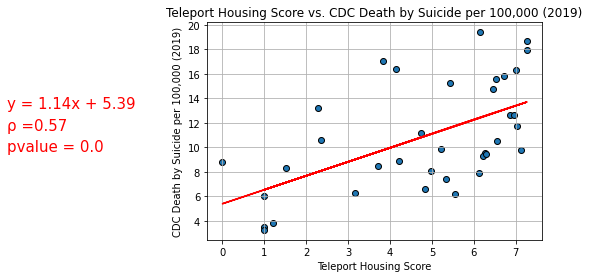

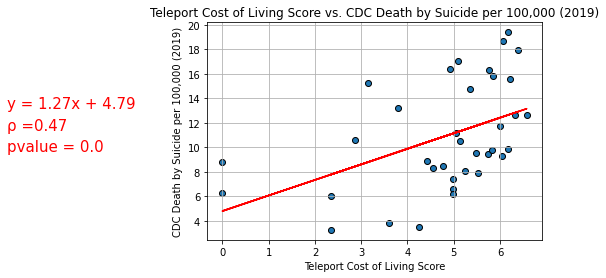

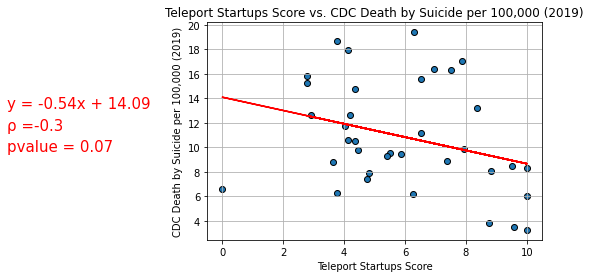

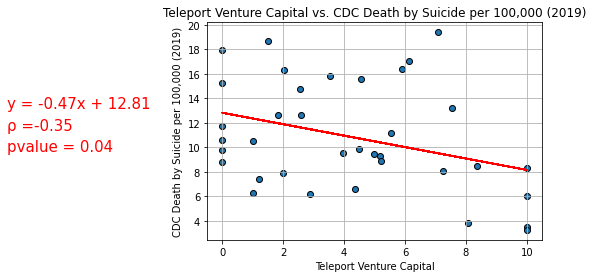

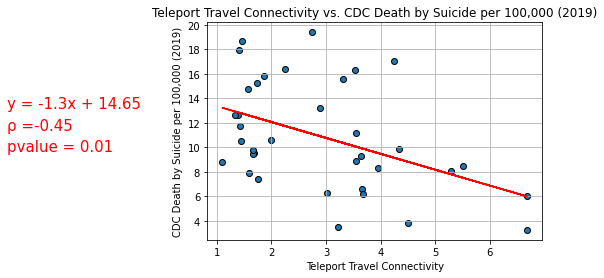

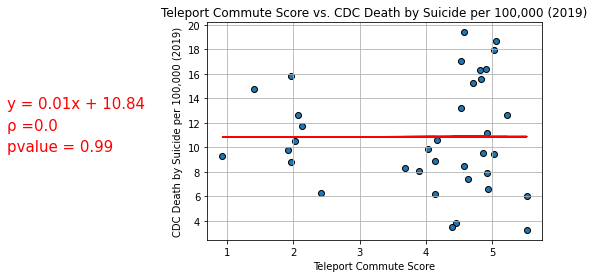

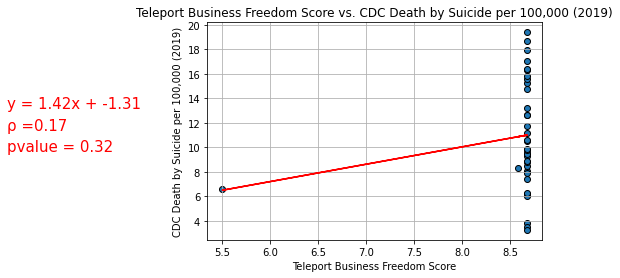

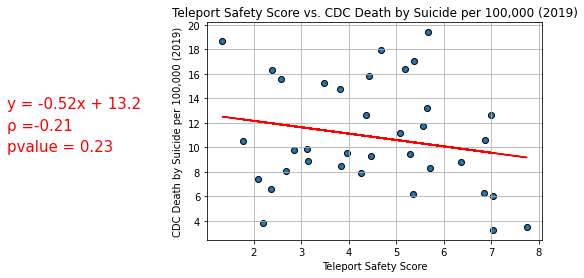

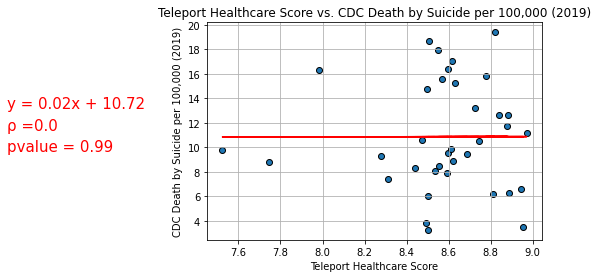

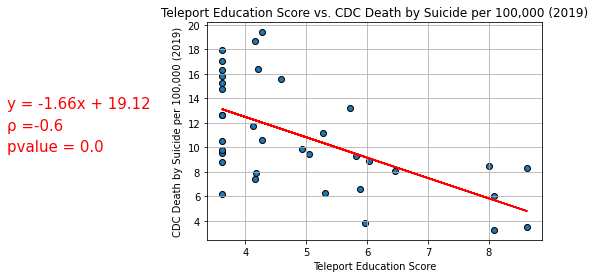

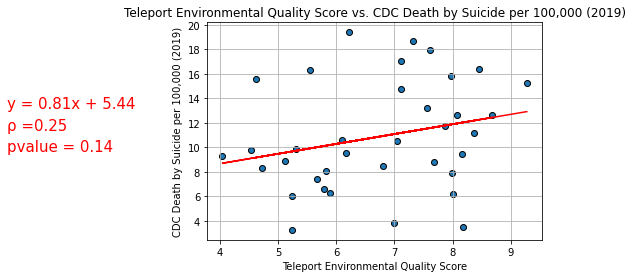

/Users/paulenestvedt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/paulenestvedt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/paulenestvedt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


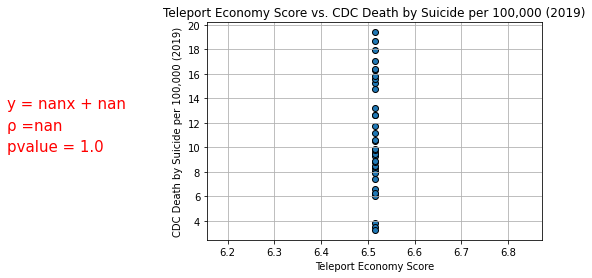

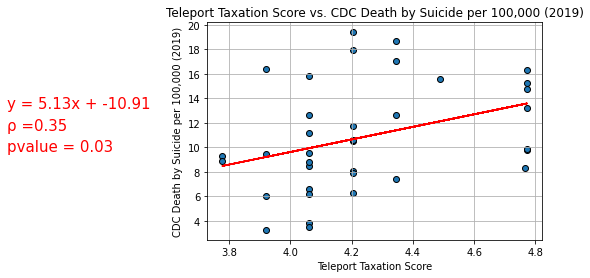

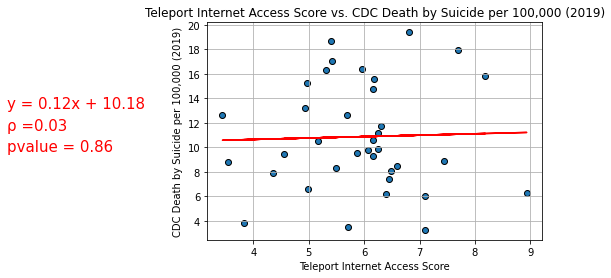

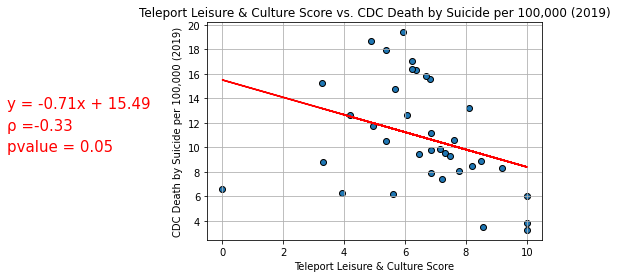

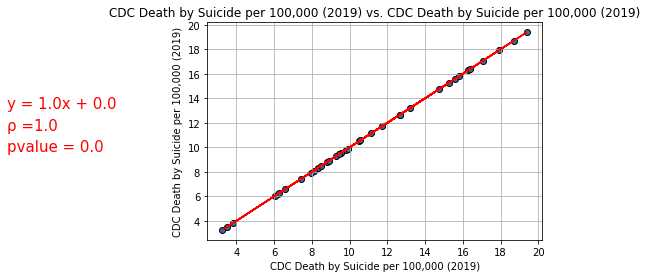

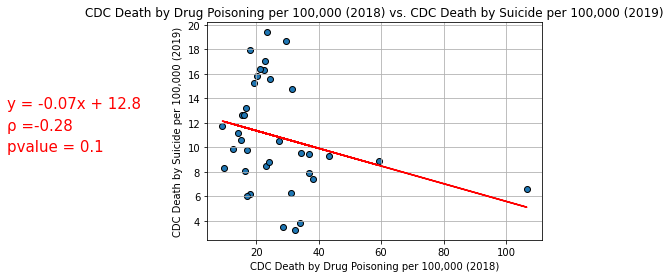

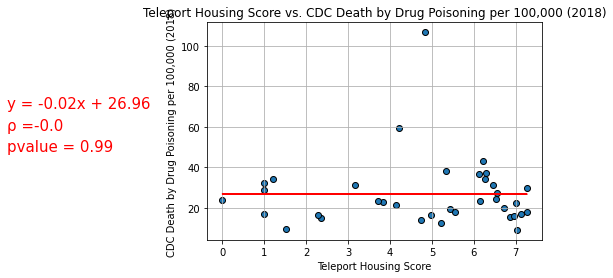

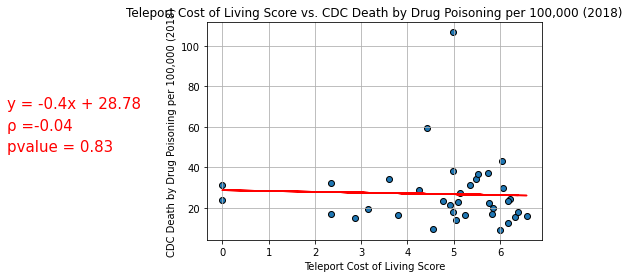

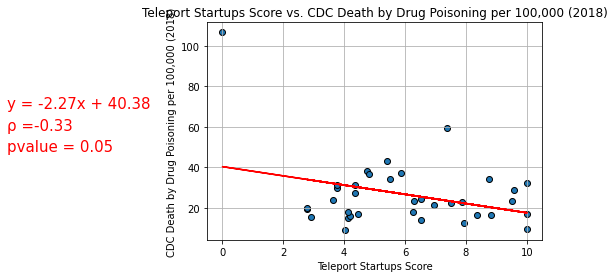

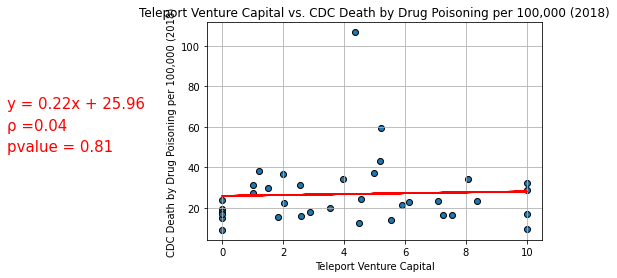

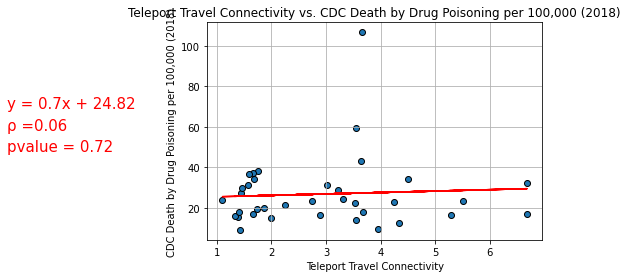

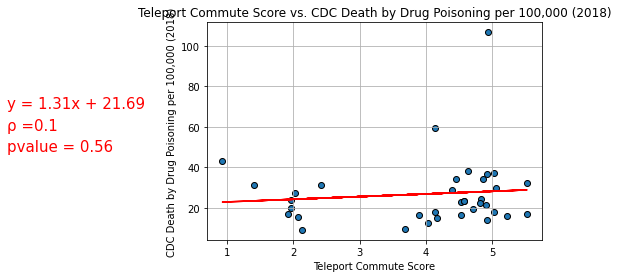

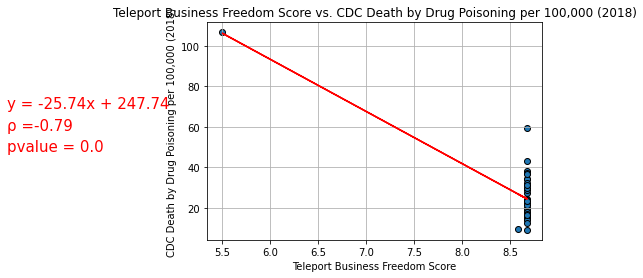

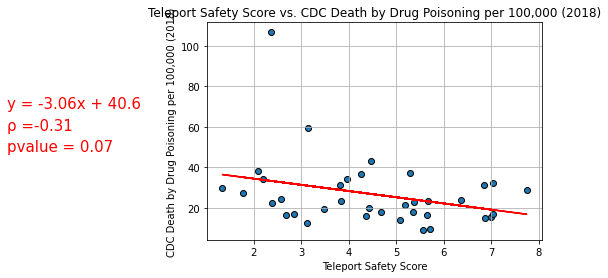

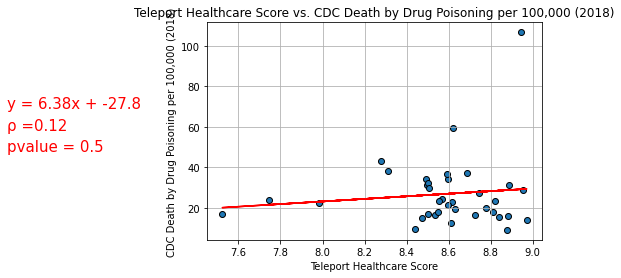

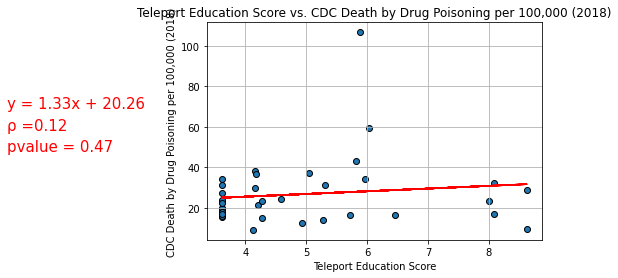

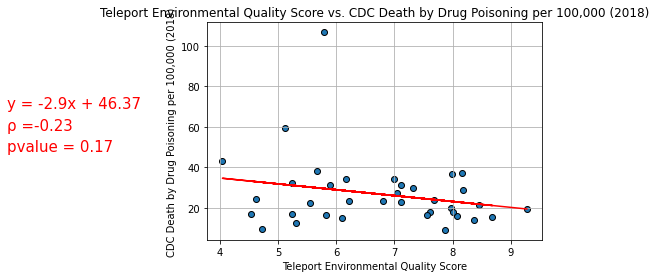

/Users/paulenestvedt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/paulenestvedt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/paulenestvedt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


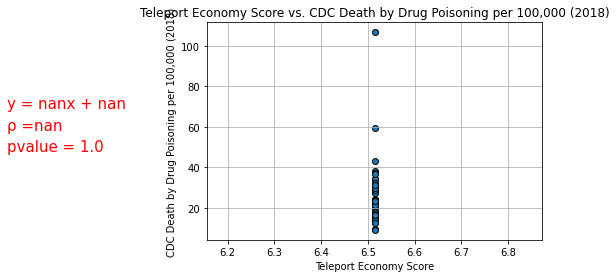

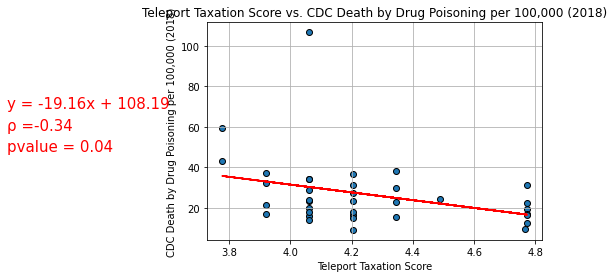

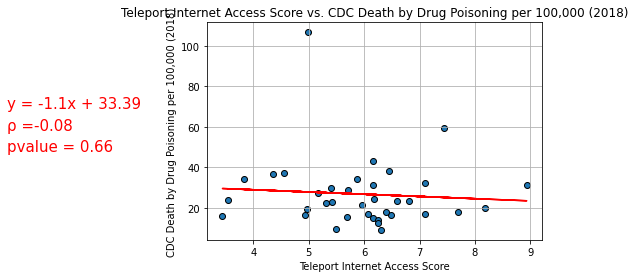

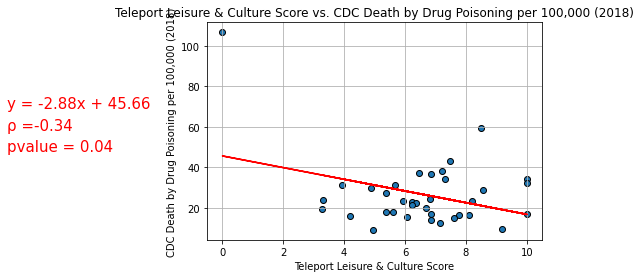

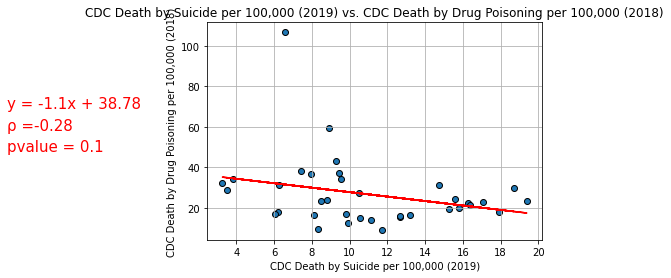

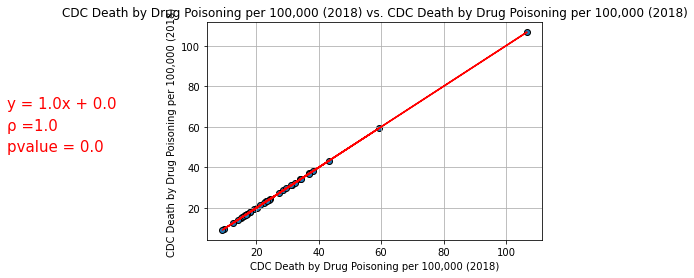

In [209]:
#loop to scatter plot column comparisons
for y in y_cols:
    for x in x_cols:
        make_plot(x, y, True)

In [215]:
desperation_df = combined_data[['City', 'State', 'County', 
       'CDC Death by Suicide per 100,000 (2019)',
       'CDC Death by Drug Poisoning per 100,000 (2018)']]

In [216]:
desperation_df.describe()

,"CDC Death by Suicide per 100,000 (2019)","CDC Death by Drug Poisoning per 100,000 (2018)"
count,36.000000,36.000000
mean,10.861933,26.874916
std,4.405619,17.169873
min,3.254169,9.193817
25%,8.044993,16.979066
50%,9.851847,23.030857
75%,14.860890,31.663485
max,19.389247,106.635164
